In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"
table_name = "houseprices"

db_url = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"

engine = create_engine(db_url)

prices_df = pd.read_sql_query(f"SELECT * FROM {table_name};", con=engine)

# close the db connetion
engine.dispose()

<IPython.core.display.Javascript object>

In [3]:
prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

### Investigate the data, and do any necessary data cleaning.

In [4]:
print(prices_df.shape)
(prices_df.isnull().sum() / prices_df.isnull().count()).sort_values(
    ascending=False
).head(20)

(1460, 81)


poolqc          0.995205
miscfeature     0.963014
alley           0.937671
fence           0.807534
fireplacequ     0.472603
lotfrontage     0.177397
garagecond      0.055479
garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagequal      0.055479
bsmtexposure    0.026027
bsmtfintype2    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrarea      0.005479
masvnrtype      0.005479
electrical      0.000685
utilities       0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [5]:
# 'lotfrontage', 'fireplacequ', 'fence', 'alley', 'miscfeature', 'poolqc' have more than
# 10% null values so we will drop those columns
prices_df2 = prices_df.copy()
cols_to_drop = ["lotfrontage", "fireplacequ", "fence", "alley", "miscfeature", "poolqc", "id"]
prices_df2.drop(columns=cols_to_drop, inplace=True)
print((prices_df2.isnull().sum() / prices_df2.isnull().count()).sort_values(ascending=False).head(14))
prices_df2.head()


garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagequal      0.055479
garagecond      0.055479
bsmtfintype2    0.026027
bsmtexposure    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrtype      0.005479
masvnrarea      0.005479
electrical      0.000685
yearremodadd    0.000000
dtype: float64


,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [6]:
cols_with_nulls = (
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .head(13)
    .index
)
cols_with_nulls

Index(['garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond',
       'bsmtfintype2', 'bsmtexposure', 'bsmtfintype1', 'bsmtcond', 'bsmtqual',
       'masvnrtype', 'masvnrarea', 'electrical'],
      dtype='object')

<IPython.core.display.Javascript object>

In [7]:
prices_df2.dropna(inplace=True)
(prices_df2.isnull().sum() / prices_df2.isnull().count()).sort_values(
    ascending=False
).head(12)

saleprice       0.0
roofstyle       0.0
exterior1st     0.0
exterior2nd     0.0
masvnrtype      0.0
masvnrarea      0.0
exterqual       0.0
extercond       0.0
foundation      0.0
bsmtqual        0.0
bsmtcond        0.0
bsmtexposure    0.0
dtype: float64

<IPython.core.display.Javascript object>

### Explore the data and find some variables that you think would be useful in predicting house prices.

<AxesSubplot:>

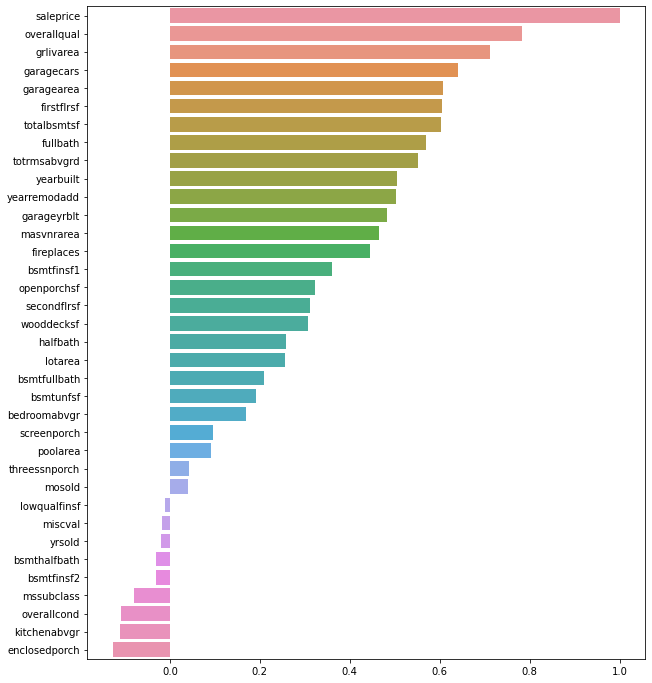

<IPython.core.display.Javascript object>

In [19]:
corr_data = prices_df2.corrwith(prices_df2["saleprice"]).sort_values(ascending=False)
plt.figure(figsize=[10, 12])
sns.barplot(x=corr_data.values, y=corr_data.index)

In [26]:
corr_data.iloc[np.where(abs(corr_data.values) >= 0.1)]

saleprice        1.000000
overallqual      0.783546
grlivarea        0.711706
garagecars       0.640154
garagearea       0.607535
firstflrsf       0.604714
totalbsmtsf      0.602042
fullbath         0.569313
totrmsabvgrd     0.551821
yearbuilt        0.504297
yearremodadd     0.501435
garageyrblt      0.481730
masvnrarea       0.465811
fireplaces       0.445434
bsmtfinsf1       0.359677
openporchsf      0.322786
secondflrsf      0.311354
wooddecksf       0.305983
halfbath         0.258175
lotarea          0.254757
bsmtfullbath     0.209695
bsmtunfsf        0.191689
bedroomabvgr     0.169266
overallcond     -0.108627
kitchenabvgr    -0.111408
enclosedporch   -0.127385
dtype: float64

<IPython.core.display.Javascript object>

In [27]:
feature_cols = corr_data.iloc[np.where(abs(corr_data.values) >= 0.1)].index
feature_cols

Index(['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'garagearea',
       'firstflrsf', 'totalbsmtsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt',
       'yearremodadd', 'garageyrblt', 'masvnrarea', 'fireplaces', 'bsmtfinsf1',
       'openporchsf', 'secondflrsf', 'wooddecksf', 'halfbath', 'lotarea',
       'bsmtfullbath', 'bsmtunfsf', 'bedroomabvgr', 'overallcond',
       'kitchenabvgr', 'enclosedporch'],
      dtype='object')

<IPython.core.display.Javascript object>

### Build your initial model using these features and estimate the parameters using OLS.

In [28]:
import statsmodels.api as sm



<IPython.core.display.Javascript object>

In [41]:
y = prices_df2["saleprice"]
X = prices_df2[feature_cols]
X = X.drop("saleprice", axis=1)

<IPython.core.display.Javascript object>

In [42]:
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [46]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:58   Log-Likelihood:                -15904.
No. Observations:                1338   AIC:                         3.186e+04
Df Residuals:                    1312   BIC:                         3.200e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.588e+05   1.57e+05     -5.466      0.000   -1.17e+06   -5.51e+05
overallqual    1.807e+04   1285.224     14.062      0.000    1.56e+04    2.06e+04
grlivarea        23.3553     24.912      0.937      0.349     -25.517      72.228
garagecars     1.554e+04   3108.508      4.999      0.000    9440.847    2.16e+04
garagearea        9.9663     10.487      0.950      0.342     -10.606      30.539
firstflrsf       16.2364     25.664      0.633      0.527     -34.111      66.584
totalbsmtsf      21.7940      8.429      2.586      0.010       5.259      38.329
fullbath       -109.0310   3084.887     -0.035      0.972   -6160.881    5942.819
totrmsabvgrd   6550.0794   1302.498      5.029      0.000    3994.872    9105.287
yearbuilt       317.9304     79.334      4.008      0.000     162.295     473.565
yearremodadd    157.9738     76.556      2.064      0.039       7.788     308.159
garageyrblt     -79.1474     82.537     -0.959      0.338    -241.066      82.771
masvnrarea       27.0743      6.163      4.393      0.000      14.983      39.165
fireplaces     4264.2825   1861.904      2.290      0.022     611.648    7916.917
bsmtfinsf1        6.9237      6.274      1.104      0.270      -5.384      19.232
openporchsf      -3.4162     16.484     -0.207      0.836     -35.754      28.921
secondflrsf      18.2750     24.998      0.731      0.465     -30.765      67.315
wooddecksf       19.3090      8.246      2.342      0.019       3.132      35.486
halfbath      -3386.6470   2874.959     -1.178      0.239   -9026.666    2253.372
lotarea           0.4286      0.103      4.152      0.000       0.226       0.631
bsmtfullbath   7152.8127   2661.163      2.688      0.007    1932.212    1.24e+04
bsmtunfsf        -2.4705      6.357     -0.389      0.698     -14.941      10.000
bedroomabvgr  -7731.4663   1863.294     -4.149      0.000   -1.14e+04   -4076.105
overallcond    6058.2501   1150.833      5.264      0.000    3800.576    8315.925
kitchenabvgr  -3.973e+04   6295.598     -6.311      0.000   -5.21e+04   -2.74e+04
enclosedporch     3.6031     17.868      0.202      0.840     -31.450      38.656
==============================================================================
Omnibus:                      782.368   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147775.089
Skew:                          -1.618   Prob(JB):                         0.00
Kurtosis:                      54.383   Cond. No.                     2.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problem

<IPython.core.display.Javascript object>

In [50]:
results.predict(X)

0       223596.467410
1       191578.671281
2       217270.912817
3       198262.563091
4       297090.972926
            ...      
1455    180737.769587
1456    242096.131570
1457    240762.521538
1458    129529.508490
1459    146605.700727
Length: 1338, dtype: float64

<IPython.core.display.Javascript object>